In [17]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

import requests
import json
from pprint import pprint

In [34]:
# Yearly change for Temperature
url = "http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/USA"
request = requests.get(url).json()

# pprint(request)
len(request)

year = []
data = []
for x in range(len(request)):
    year.append(request[x]['year'])
    data.append(request[x]['data'])
    
year_df = pd.DataFrame({"Year": year,
                       "Temperature": data})
year_df.head()
# year_df.plot("Year", "Data", kind="line")

,Year,Temperature
0,1901,6.618749
1,1902,6.464327
2,1903,6.073844
3,1904,6.149883
4,1905,6.599617


In [33]:
url = "http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/month/USA"
request = requests.get(url).json()

pprint(request)
# len(request)

# year = []
# data = []
# for x in range(len(request)):
#     year.append(request[x]['year'])
#     data.append(request[x]['data'])
    
# year_df = pd.DataFrame({"Year": year,
#                        "Data": data})
# year_df.plot("Year", "Data", kind="line")

[{'data': -5.6620183, 'month': 0},
 {'data': -3.8577042, 'month': 1},
 {'data': 0.051682897, 'month': 2},
 {'data': 5.926177, 'month': 3},
 {'data': 11.959194, 'month': 4},
 {'data': 16.9164, 'month': 5},
 {'data': 19.6669, 'month': 6},
 {'data': 18.691568, 'month': 7},
 {'data': 14.49659, 'month': 8},
 {'data': 7.980858, 'month': 9},
 {'data': 0.6838347, 'month': 10},
 {'data': -4.223826, 'month': 11}]


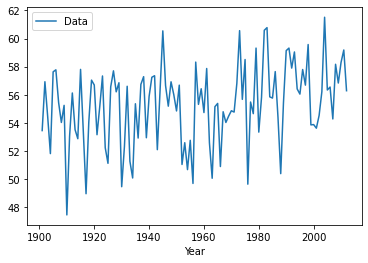

In [32]:
url = "http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/pr/year/USA"
request = requests.get(url).json()

# pprint(request)
len(request)

year = []
data = []
for x in range(len(request)):
    year.append(request[x]['year'])
    data.append(request[x]['data'])
    
year_df = pd.DataFrame({"Year": year,
                       "Data": data})
year_df.plot("Year", "Data", kind="line")

# Read USA csv
usa_df = pd.read_csv("USA_df.csv")
usa_df

In [3]:
# Read AUS csv
aus_df = pd.read_csv("AUS_df.csv")
aus_df

,Unnamed: 0,AUS Month,Average Temp (1980 - 1999),Monthly Precipitation (1980-1999),Precipiation(1980-1999),Average Temp(1940-1959),Precipitation(1940-1959)
0,0,January,25.878153,145.214744,54.085429,-10.158916,56.021723
1,1,February,25.434410,152.100066,50.109668,-8.921036,50.803536
2,2,March,24.167363,132.246930,59.514374,-4.480659,60.840752
3,3,April,21.875149,95.781928,65.556613,2.211141,63.113625
4,4,May,18.286651,65.688737,70.434940,8.659985,71.053305
5,5,June,14.874277,46.760808,68.001146,14.128584,68.206981
6,6,July,13.971267,47.374530,74.484280,18.067874,73.077792
7,7,August,15.742309,42.637932,74.436758,17.696446,77.572825
8,8,September,18.381544,49.623076,76.553649,13.254825,75.871852
9,9,October,21.806942,58.675784,69.602309,6.582814,67.096864


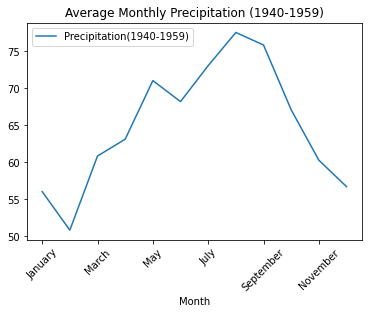

In [13]:
# Analysis of USA Temp vs Time (1940-1959)
usa_df.plot("Month", "Precipitation(1940-1959)", kind="line", rot=45, title="Average Monthly Precipitation (1940-1959)")

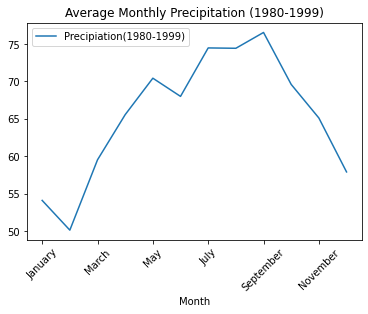

In [14]:
# Analysis of USA Temp vs Time (1980-1999)
usa_df.plot("Month", "Precipiation(1980-1999)", kind="line", rot=45, title="Average Monthly Precipitation (1980-1999)")

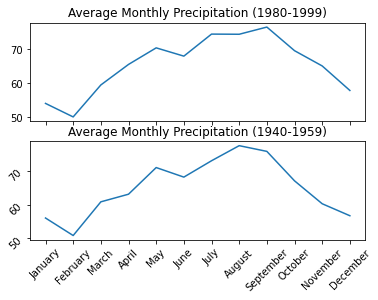

In [6]:
month = usa_df["Month"]
fig, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(month, usa_df["Precipiation(1980-1999)"])
ax1.set_title("Average Monthly Precipitation (1980-1999)")

ax2.plot(month, usa_df["Precipitation(1940-1959)"])
ax2.set_title("Average Monthly Precipitation (1940-1959)")
ax2.tick_params(labelrotation=45)

plt.show()

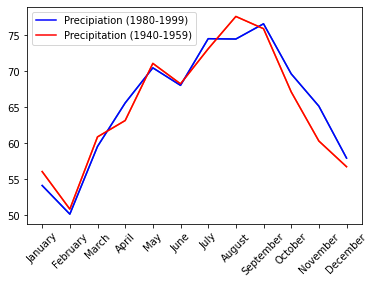

In [16]:
plt.plot(month, usa_df["Precipiation(1980-1999)"])
plt.plot(month, usa_df["Precipitation(1940-1959)"])
plt.xticks(rotation=45)

new_handle, = plt.plot(month, usa_df["Precipiation(1980-1999)"], color = "blue", label ="Precipiation (1980-1999)")
old_handle, = plt.plot(month, usa_df["Precipitation(1940-1959)"], color = "red", label ="Precipitation (1940-1959)")
plt.legend(handles=[new_handle, old_handle], loc = "best")

plt.show()